# Electronic Sales 2019 - An exploratory analysis on the electronic sales data in US

This project is an exploratory analysis on the electronic sales of a US company in 2019. This analysis done for evaluating the sales performance in that year. So we can improve sales on 2020.

## Table of Contents
1. Environment Setup
2. Business Understanding
3. Data Understanding
4. Data Preparation
5. Exploratory Data Analysis
6. Conclusion

## 1. Setup Environment

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Merge data from each month into one CSV file

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("sales_data_in_2019.csv", index=False)

## 2. Business Understanding
In this project, we use sales data created in a whole year of 2019. Each row of the data represents an order. We can see the first column, "Order ID", as the identifier of each sales. We will analyze this dataset to answer 5 business questions.

#### Business Questions
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?
4. What product sold the most?
5. What product contributed the most to sales?

##### Suggestions for further exploration:
1. Tampilkan menggunakan diagram batang yang tumpang tindih supaya tau (misal: pada bulan ke-4) proporsi produk yang terjual seperti apa (misal: pada bulan April, 60% berasal dari penjualan produk A, 30% produk B, 6% produk C, 4% produk lainnya). Dengan mengetahui hal tersebut kita jadi tahu dinamika penjualan produk tiap bulannya dan bisa mengatur strategi penjualan yang efektif.

## 3. Data Understanding
This sales dataset consists of 6 variables/features.
1. Order ID: id of each sales order
2. Product: the product name
3. Quantity Ordered: the quantity ordered
4. Price Each: the price for each order
5. Order Date: the date when the order was taken
6. Purchase Order: the destination address of the order

#### Read dataframe

In [2]:
df_ori = pd.read_csv("sales_data_in_2019.csv")
df = df_ori.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001', nan,
       '682 Chestnut St, Boston, MA 02215', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

#### Get familiar with the data

In [4]:
# data dimension
print("Num of rows:", df.shape[0])
print("Num of cols:", df.shape[1])

Num of rows: 186850
Num of cols: 6


In [5]:
# simple info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


After reviewing the top rows of the dataset and simple information about the data, we can guess that there are bad data in the columns **'Order ID'**, **'Quantity Ordered'**, and **'Price Each'**. In the context of this dataset, these three columns should contain numeric data, not objects/categories. This problem will further be explored in the **Data Preparation** stage.

In [6]:
# basic descriptive statistics of the dataset
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


We found interesting information in the table above: the strings **'Order ID', 'Order Date', and 'Purchase Address'** are the **most data appearing** in each column. Though the three columns should not contain such data.

## 4. Data Preparation
There are 5 things that can be preprocessed before conducting the analysis:
1. Anomalies 
2. Duplicated Entries
3. Missing Value
4. Data Types Re-formatting
5. Get Hour, Day, and Month from 'Order Date'
6. Get City & State from 'Purchase Address'

Todo for Extra EDA:
1. Mendetailkan 'Product' sampai ke tingkat jenis produk (e.g. Headphone, Charging Cable, Phone, etc.)

### Task 1. Anomalies
We found 2 anomalies in the Data Understanding stage:
1. Columns **'Order ID', 'Quantity Ordered', and 'Price Each'** have **object/category** data types which are **supposed to be numeric**.
2. The strings **'Order ID', 'Order Date', and 'Purchase Address'** are the data that appear the most in those three columns. 

Let's explore these anomalies!

#### 1.1. Columns 'Order ID', 'Quantity Ordered', and 'Price Each' data types

In [7]:
# Checking the unique value in 'Order ID'
df['Order ID'].unique()

array(['176558', nan, '176559', ..., '259355', '259356', '259357'],
      dtype=object)

In the output above we can conclude that:
* Actually, the data in this column have **numeric** data type. But, they are **stored in the form of strings**.
* This column contains **missing values**.

In [8]:
# Checking the unique value in 'Quantity Ordered'
df['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

In [9]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In the output above we can conclude that:
* Actually, the data in this column have **numeric** data type. But, they are **stored in the form of strings**.
* This column contains **missing values**.
* This dataset contains **duplicated entries** and **the value** for each column is the **name of each column**.

In [10]:
# drop entries containing values 'Quantity Ordered' on that columns
df.drop(df[df['Quantity Ordered'] == 'Quantity Ordered'].index, inplace=True)

In [11]:
df['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

Based on the output above, the entry containing **'Quantity Ordered' no longer exists**.

In [12]:
# Checking the unique value in 'Price Each'
df['Price Each'].unique()

array(['11.95', nan, '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In the output above we can conclude that:
* Actually, the data in this column have **numeric** data type. But, they are **stored in the form of strings**.
* This column contains **missing values**.

#### 1.2. The presence of strings 'Order ID', 'Order Date', and 'Purchase Address'

The strings 'Order ID', 'Order Date', and 'Purchase Address' are the data that appear the most in those three columns.

In [13]:
# Checking all entries containing string 'Order ID' in column 'Order ID'
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
# Checking all entries containing string 'Order Date' in column 'Order Date'
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
# Checking all entries containing string 'Purchase Address' in column 'Purchase Address'
df[df['Purchase Address'] == 'Purchase Address']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Based on the output above we can conclude that the dataframe df has no entry with value 'Order ID', 'Order Date', or 'Purchase Address' anymore.

##### Conclusions
Based on anomalies exploration above, there are 3 things that need to be done in the next stage, namely:
1. Dealing with duplicated entries
2. Dealing with missing value
3. Correcting the data format

### Task 2. Dealing with Duplicated Entries

In [16]:
# check any duplicates row in dataframe
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1433,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186508,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
186548,NaN,NaN,NaN,NaN,NaN,NaN
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [17]:
# get the total number of real duplicated entries
print('total duplicated entries:', len(df[df.duplicated()]['Order ID'].unique()))

total duplicated entries: 265


Based on the output above, we can see that the df dataframe has **265 duplicate entries**, bringing the total together with the duplicates to **808 entries**.

In [18]:
# drop duplicated entries and keep the first occurence of each item
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Based on the output above, we can conlude that the duplicated entries have been removed.

### Task 3. Dealing with Missing Value

In [19]:
# check if dataframe has any missing (NaN) values
df.isnull().values.any()

True

In [20]:
# get the total missing values in each columns
df.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [21]:
df[df['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


From last three lines above, we know that there is only one NaN values for each column and they are placed in a same row. So, we can conclude that **there is only one row with NaN values** in the entire columns. There is no other entry containing NaN values. Therefore, what we can do to the missing value in this dataframe is **remove the entry/row** containing the missing value.

In [22]:
# remove row with NaN values in the entire columns
df.dropna(how='all', inplace=True)

# check NaN values again
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Task 4. Data Types Re-formatting
In this section we will correcting the data type format of columns 'Order ID', 'Quantity Ordered', and 'Price Each' from object/categorical to numeric.

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


In [26]:
# set the data type to numeric
df['Order ID'] = df['Order ID'].astype('int64')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.8+ MB


Based on the output above, we can confirm that the data types for the columns 'Order ID', 'Quantity Ordered', and 'Price Each' have been changed to numeric.

In [28]:
# get descriptive statistic of numerical columns
df.describe()

,Order ID,Quantity Ordered,Price Each
count,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255
std,51511.717183,0.443069,332.843838
min,141234.000000,1.000000,2.990000
25%,185833.250000,1.000000,11.950000
50%,230354.500000,1.000000,14.950000
75%,275028.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [29]:
# get descriptive statistic of categorical columns
df.describe(include=['O'])

,Product,Order Date,Purchase Address
count,185686,185686,185686
unique,19,142395,140787
top,USB-C Charging Cable,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,21859,8,9


### Task 5. Get Hour, Day, and Month from 'Order Date'

#### 5.1. Get Order Month

In [30]:
# create new column 'Order Month'
df['Order Month'] = df['Order Date'].str[0:2]
df['Order Month'] = pd.to_numeric(df['Order Month'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### 5.2. Get Order Day
With [weekday()](https://docs.python.org/3/library/datetime.html#datetime.date.weekday), we get **0 for Monday** and **6 for Sunday**

In [31]:
# get date element fron 'Order Date'
dates = df['Order Date'].map(lambda date: date.split(' ')[0])
dates = pd.to_datetime(dates)

# create new column 'Order Day'
df['Order Day'] = dates.map(lambda date: date.weekday())
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1


#### 5.3. Get Order Hour

In [32]:
df['Order Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day,Order Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,9


### Task 6. Get City & State from 'Purchase Address'

In [33]:
def get_city(addr):
    return addr.split(',')[1].strip()

def get_state(addr):
    return addr.split(',')[2].split(' ')[1]

In [34]:
df['City'] = df['Purchase Address'].apply(lambda addr: f"{get_city(addr)} ({get_state(addr)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day,Order Hour,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6,22,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,9,Los Angeles (CA)


## 5. Exploratory Data Analysis
Pada tahapan ini kita akan mengeksplor data yang telah kita siapkan. Fokus utama kita di sini adalah untuk menjawab 5 pertanyaan yang sudah disampaikan di awal. Setelah kita berhasil menjawab kelima pertanyaan tersebut, kita akan mengeksplorasi data ini untuk mencari insight yang mungkin dapat berguna nantinya.

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day,Order Hour,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6,22,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,9,Los Angeles (CA)


### Q1. What was the best month for sales? How much was earned that month?

#### Task 1. Create Sales Column

In [36]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day,Order Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,8,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6,22,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,9,Los Angeles (CA),11.99


#### Task 2. Get sales for each months

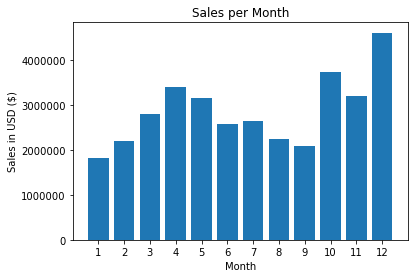

In [37]:
months = range(1,13)

# setup the bar chart
plt.bar(months, df.groupby(['Order Month'])['Sales'].sum())

# set bar chart appearance
plt.title("Sales per Month")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.show()

In [38]:
# Get sales on December
print("Sales on December:", df.groupby(['Order Month'])['Sales'].sum().iloc[11])

Sales on December: 4608295.700001529


#### Conclusions for Q1

##### What was the best month for sales?
The best month for sales in 2019 was **December**

##### How much was earned that month?
Sales in December was **$4,608,295.70**

### Extra Data Exploration for Q1
Berdasarkan kesimpulan di atas, ada dua hal yang dapat kita ketahui lebih jauh:
1. Produk apa yang **terjual paling banyak** pada bulan tersebut?
2. Produk apa yang berkotribusi paling banyak terhadap **penjualan** pada bulan tersebut?

#### Extra Task 1. Produk yang terjual paling banyak pada bulan Desember 2019

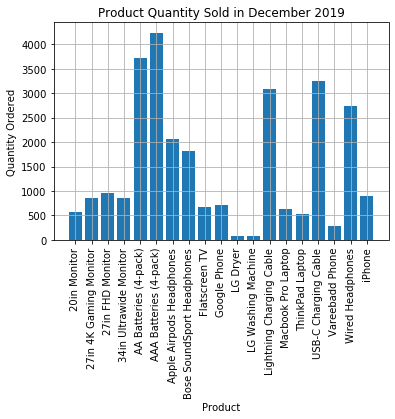

In [48]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df[df['Order Month'] == 12].groupby(['Product'])['Quantity Ordered'].sum())

# set bar chart appearance
plt.title("Product Quantity Sold in December 2019")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products, rotation='vertical')
plt.grid()
plt.show()

#### Extra Task 2. Produk yang berkontribusi paling banyak terhadap penjualan pada bulan Desember 2019

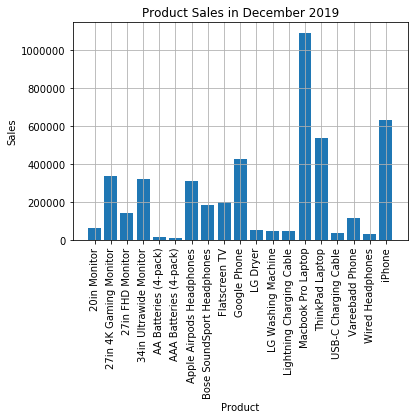

In [49]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df[df['Order Month'] == 12].groupby(['Product'])['Sales'].sum())

# set bar chart appearance
plt.title("Product Sales in December 2019")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(products, rotation='vertical')
plt.grid()
plt.show()

#### Kesimpulan
Berdasarkan eksplorasi data di atas, kita mengetahui dua fakta sebagai berikut:
1. Produk yang **terjual paling banyak** pada bulan Desember 2019 adalah **AAA Batteries (4-pack)**. Namun, produk ini berkontribusi paling sedikit terhadap penjualan pada bulan tersebut.
2. Sebaliknya, produk yang **berkontribusi paling banyak terhadap penjualan** pada bulan Desember 2019 adalah **Macbook Pro Laptop** dengan perbedaan penjualan yang cukup jauh dengan produk lainnya tetapi **jumlah produk** yang terjual tergolong **sangat sedikit**.

### Q2. What city sold the most product?
Kita dapat mencari tahu tiga hal dengan menggunakan pertanyaan ini, yaitu:
1. Kota yang menjual produk dengan jumlah terbanyak
2. Kota yang berkontribusi paling banyak terhadap penjualan

#### Task 1. Kota yang menjual produk dengan jumlah terbanyak

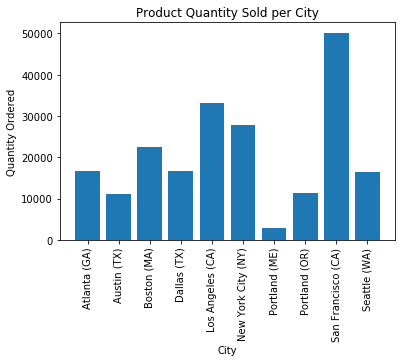

In [72]:
# get all cities in ordered
cities = [city for city, df in df.groupby(['City'])]

# setup the bar chart
plt.bar(cities, df.groupby(['City'])['Quantity Ordered'].sum())

# set bar chart appearance
plt.title("Product Quantity Sold per City")
plt.xlabel("City")
plt.ylabel("Quantity Ordered")
plt.xticks(cities, rotation='vertical')
plt.show()

#### Task 2. Kota yang berkontribusi paling banyak terhadap penjualan

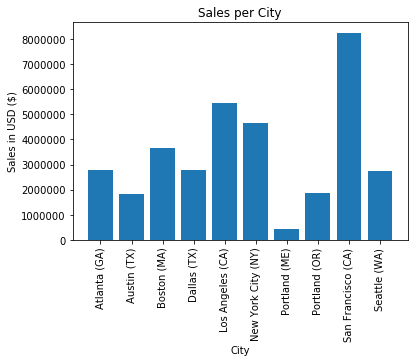

In [71]:
# get all cities in ordered
cities = [city for city, df in df.groupby(['City'])]

# setup the bar chart
plt.bar(cities, df.groupby(['City'])['Sales'].sum())

# set bar chart appearance
plt.title("Sales per City")
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")
plt.xticks(cities, rotation='vertical')
plt.show()

#### Kesimpulan

Berdasarkan eksplorasi dua grafik di atas dapat kita ketahui bahwa **penjualan di kota San Francisco (California) menunjukkan performa terbaik**, baik dalam hal **jumlah produk** yang terjual maupun total **nilai hasil penjualan** yang berhasil didapatkan. 

### Extra Data Exploration for Q2
Berdasarkan kesimpulan di atas, ada dua hal yang dapat kita ketahui lebih jauh:
1. Produk apa yang **terjual paling banyak** di kota tersebut?
2. Produk apa yang berkotribusi paling banyak terhadap **penjualan** di kota tersebut?

#### Extra Task 1. Produk yang terjual paling banyak di kota tersebut

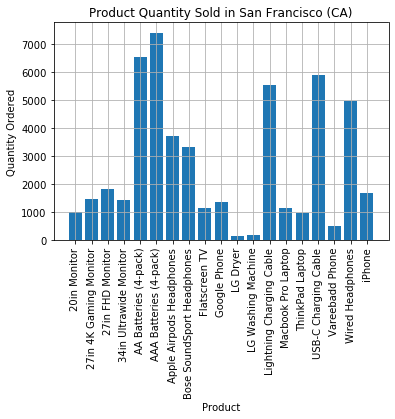

In [59]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df[df['City'] == 'San Francisco (CA)'].groupby(['Product'])['Quantity Ordered'].sum())

# set bar chart appearance
plt.title("Product Quantity Sold in San Francisco (CA)")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products, rotation='vertical')
plt.grid()
plt.show()

#### Extra Task 2. Produk yang berkontribusi paling banyak terhadap penjualan di kota San Francisco (CA)

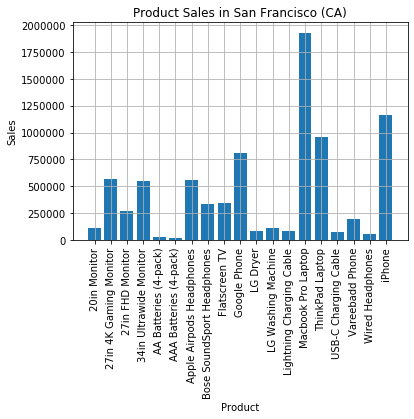

In [60]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df[df['City'] == 'San Francisco (CA)'].groupby(['Product'])['Sales'].sum())

# set bar chart appearance
plt.title("Product Sales in San Francisco (CA)")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(products, rotation='vertical')
plt.grid()
plt.show()

### Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Order Day,Order Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,8,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,6,22,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,14,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,9,Los Angeles (CA),11.99


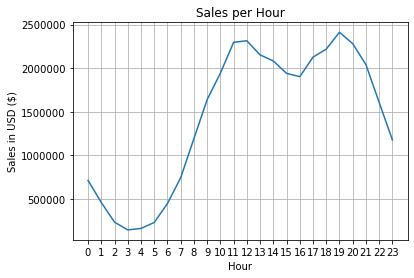

In [63]:
hours = range(0,24)

# setup the line chart
plt.plot(hours, df.groupby(['Order Hour'])['Sales'].sum())
plt.title('Sales per Hour')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.show()

Grafik di atas menampilkan rata-rata total penjualan yang terjadi setiap hari berdasarkan jam penjualannya. Berdasarkan grafik di atas, kita dapat melihat bahwa penjualan mengalami **peningkatan yang cukup stabil** dari **pukul 3 hingga 11**. Namun setelah itu terjadi penurunan penjualan hingga akhirnya **pada pukul 17 penjualan kembali mengalami peningkatan hingga pukul 19**.

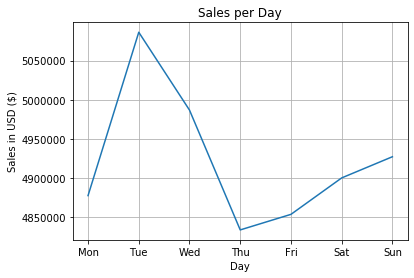

In [64]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# setup the line chart
plt.plot(days, df.groupby(['Order Day'])['Sales'].sum())
plt.title('Sales per Day')
plt.xticks(days)
plt.xlabel('Day')
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.show()

Berdasarkan grafik di atas, dapat kita ketahui bahwa penjualan **tertinggi terjadi pada hari Selasa** dan **terendah pada hari Kamis**.

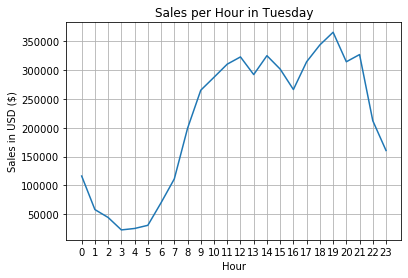

In [74]:
hours = range(0,24)

# setup the line chart
plt.plot(hours, df[df['Order Day'] == 1].groupby(['Order Hour'])['Sales'].sum())
plt.title('Sales per Hour in Tuesday')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.show()

Grafik di atas menampilkan penjualan per jam yang terjadi setiap hari Selasa. Pada grafik ini kita dapat mengetahui bahwa **penjualan mengalami peningkatan yang stabil dari pukul 3 hingga 12**. Tingkat penjualan yang terjadi **di atas jam 12 cukup fluktuatif**.

### Conclusions for Q3

##### What time should we display advertisemens to maximize the likelihood of customer’s buying product?
* Rata-rata penjualan setiap harinya mengalami peningkatan yang cukup stabil pada pukul 3 hingga 11. Oleh sebab itu, waktu yang cukup **direkomendasikan untuk menampilkan iklan adalah pukul 3 hingga 11**.  
* Jika kita ingin agar iklannya berguna secara efektif, maka **hari Selasa adalah hari yang direkomendasikan untuk menampilkan iklan** pada pelanggan karena pada hari tersebut terjadi penjualan yang paling tinggi daripada hari-hari lainnya. Sebaliknya, **tidak direkomendasikan untuk menampilkan iklan yang cukup penting pada hari Kamis** karena pada hari tersebut terjadi penjualan yang paling rendah dalam seminggu. 

### Q4. What product sold the most?

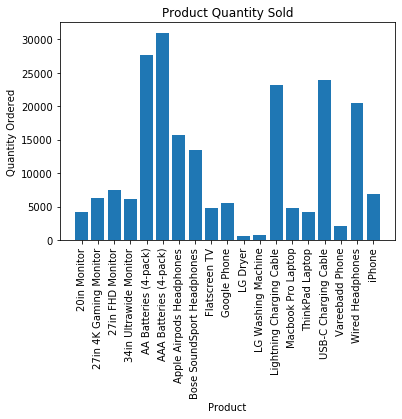

In [66]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df.groupby('Product')['Quantity Ordered'].sum())

# set bar chart appearance
plt.title("Product Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products, rotation='vertical')
plt.show()

#### Kesimpulan

Berdasarkan grafik batang di atas dapat kita simpulkan bahwa produk bernama **AAA Batteries (4-pack)** adalah produk yang **paling banyak terjual** diikuti dengan **AA Batteries (4-pack)** dan **USB-C Charging Cable** yang menempati **posisi kedua dan ketiga**.

### Q5. What product contributed the most to sales?

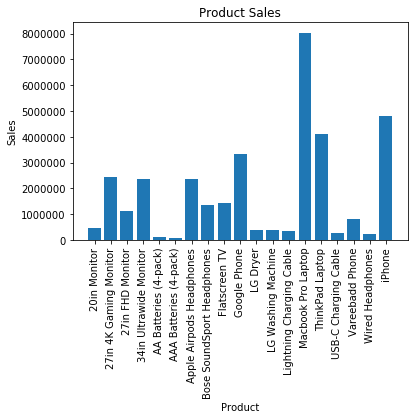

In [67]:
# get all products in ordered
products = [product for product, df in df.groupby(['Product'])]

# setup the bar chart
plt.bar(products, df.groupby('Product')['Sales'].sum())

# set bar chart appearance
plt.title("Product Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(products, rotation='vertical')
plt.show()

#### Kesimpulan
Berdasarkan grafik di atas dapat kita ketahui bahwa **produk yang berkontribusi paling banyak terhadap hasil penjualan** perusahaan di tahun 2019 ini adalah **Macbook Pro Laptop** dengan perbedaan nilai yang cukup jauh dengan hasil penjualan produk lainnya.

## [EXTRA] Exploratory Data Analysis
1. Product type sold most and the reason behind
2. Pada bulan apa produk Macbook Pro Laptop terjual paling banyak?

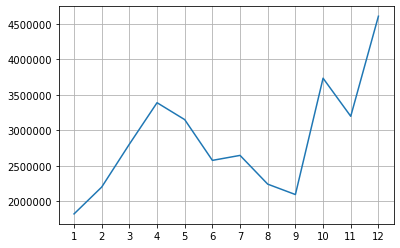

In [50]:
# EXTRA: Menampilkan line plot untuk mengetahui perkembangannya setiap bulan
plt.clf()
plt.plot(months, df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.grid()
plt.show()